In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

### Описание данных

`order_id` - id заказа  
`delivery_time` - время доставки в минутах  
`district` - район доставки  
`experiment_group` - экспериментальная группа  

### Задание 1

Сопоставьте графики распределения и  экспериментальные группы:

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-da-chernova/Stats/lesson4/experiment_lesson_4.csv')

In [3]:
df.dtypes

order_id              int64
delivery_time       float64
district             object
experiment_group     object
dtype: object

In [4]:
df.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


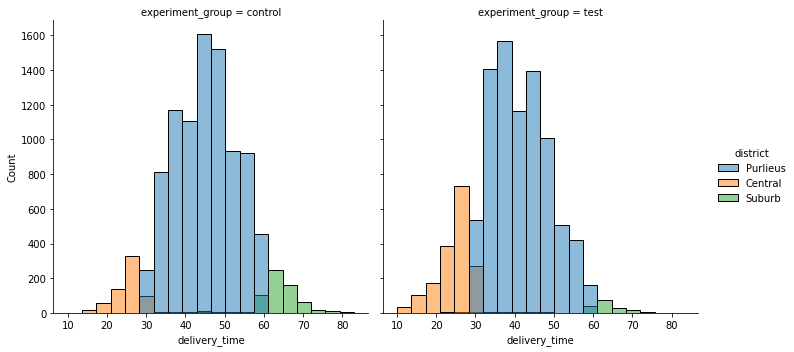

In [5]:
sns.displot(data=df, x='delivery_time', hue='district', bins=20, col='experiment_group')


### Задание 2

Посчитайте количество наблюдений в тестовой и контрольной группе. На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [6]:
df.groupby('experiment_group', as_index=False).agg({'order_id':'count'})

,experiment_group,order_id
0,control,10092
1,test,10104


In [7]:
10092 - 10104

-12

### Задание 3

Теперь давайте изучим наши распределения. Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

In [34]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


In [35]:
df_control = df.query('experiment_group == "control"').delivery_time
df_test = df.query('experiment_group == "test"').delivery_time

In [36]:
df_test

10092    38.0
10093    31.0
10094    39.0
10095    29.0
10096    31.0
         ... 
20191    42.0
20192    32.0
20193    23.0
20194    41.0
20195    41.0
Name: delivery_time, Length: 10104, dtype: float64

In [37]:
scipy.stats.normaltest(df_test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [38]:
scipy.stats.normaltest(df_control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [45]:
0.02983483685333173 < 0.05
#отклоняем в тесте
#распределение ненормально в тесте

True

In [46]:
0.8809549607809654 < 0.05
#принимаем в контрольной
#распределение нормально в контроле

False

In [51]:
round(df_control.std(), 2)

9.99

In [53]:
round(df_test.std(), 2)

9.88

### Задание 4

Вас могла смутить ненормальность распределения теста, полученная на прошлом шаге - однако если посмотреть на саму форму распределения, то оно не настолько сильно нарушает нормальность, чтобы об этом беспокоиться на таком размере выборки! Поэтому не переживаем 😎

Теперь пришло время сравнить средние в тесте и контроле. 

In [56]:
scipy.stats.ttest_ind(df_control, df_test)

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

### Задание 5

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)? 

In [76]:
(df_test.mean() - df_control.mean())/df_control.mean() * 100

-13.354653121660812

In [77]:
round(-13.354653121660812, 2)

-13.35